# Chapter 5 Deep Learning for computer vision

## 5.1 Introduction to convnets

In [1]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [2]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 11s 190us/step - loss: 0.1666 - acc: 0.9499
Epoch 2/5
60000/60000 [==============================] - 10s 173us/step - loss: 0.0469 - acc: 0.9857
Epoch 3/5
60000/60000 [==============================] - 10s 168us/step - loss: 0.0321 - acc: 0.9900
Epoch 4/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.0241 - acc: 0.9928
Epoch 5/5
60000/60000 [==============================] - 10s 167us/step - loss: 0.0185 - acc: 0.9940


In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 80us/step


In [6]:
test_acc

0.9792

In [7]:
import keras.backend as K

del model
K.clear_session()

## 5.2 Training a convnet from scratch on a small dataset

In [8]:
import os, shutil

original_dataset_dir = '../data/train/'

# The directory where we will store our smaller dataset
base_dir = '../data/cats_and_dogs_small'
os.makedirs(base_dir, exist_ok=True)

# Create {train, valid, test} data directories
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
valid_dir = os.path.join(base_dir, 'valid')
os.makedirs(valid_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)


# Create {train, valid, test} data directories for each class
# TRAINING
train_cats_dir = os.path.join(train_dir, 'cats'); os.makedirs(train_cats_dir, exist_ok=True)
train_dogs_dir = os.path.join(train_dir, 'dogs'); os.makedirs(train_dogs_dir, exist_ok=True)

# VALIDATION
valid_cats_dir = os.path.join(valid_dir, 'cats'); os.makedirs(valid_cats_dir, exist_ok=True)
valid_dogs_dir = os.path.join(valid_dir, 'dogs'); os.makedirs(valid_dogs_dir, exist_ok=True)

# TEST
test_cats_dir = os.path.join(test_dir, 'cats'); os.makedirs(test_cats_dir, exist_ok=True)
test_dogs_dir = os.path.join(test_dir, 'dogs'); os.makedirs(test_dogs_dir, exist_ok=True)


# Copy images from original directories to created directories
# {train, valid, test} for cat class
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(valid_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# {train, valid, test} for dog class
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(valid_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [10]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

valid_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [13]:
%%time

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=valid_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 14s 141ms/step - loss: 0.6860 - acc: 0.5290 - val_loss: 0.6679 - val_acc: 0.5820
Epoch 2/30
100/100 [==============================] - 13s 131ms/step - loss: 0.6472 - acc: 0.6200 - val_loss: 0.6267 - val_acc: 0.6310
Epoch 3/30
100/100 [==============================] - 13s 130ms/step - loss: 0.6002 - acc: 0.6610 - val_loss: 0.6076 - val_acc: 0.6520
Epoch 4/30
100/100 [==============================] - 13s 131ms/step - loss: 0.5621 - acc: 0.7105 - val_loss: 0.6212 - val_acc: 0.6610
Epoch 5/30
100/100 [==============================] - 13s 129ms/step - loss: 0.5412 - acc: 0.7190 - val_loss: 0.5843 - val_acc: 0.6820
Epoch 6/30
100/100 [==============================] - 13s 132ms/step - loss: 0.5084 - acc: 0.7485 - val_loss: 0.7894 - val_acc: 0.5820
Epoch 7/30
100/100 [==============================] - 13s 129ms/step - loss: 0.4901 - acc: 0.7530 - val_loss: 0.5561 - val_acc: 0.7030
Epoch 8/30
100/100 [==============================] - 1

In [14]:
model.save('../model/cats_and_dogs_small_1.h5')

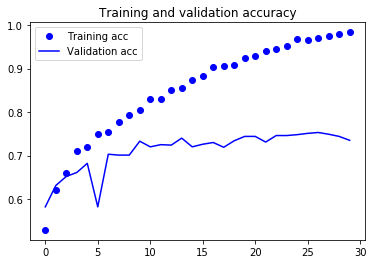

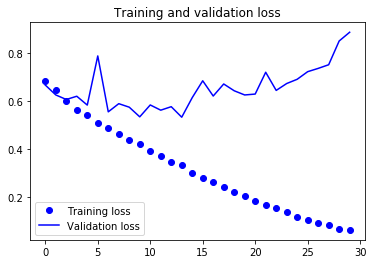

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Clear session.

In [16]:
import keras.backend as K

del model
K.clear_session()

### Train a model with augmented data.

In [17]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

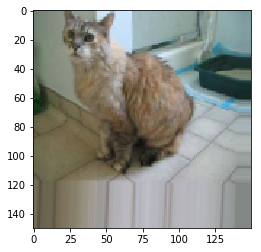

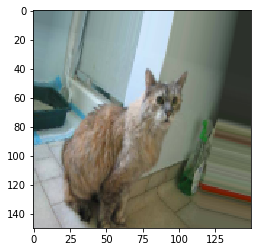

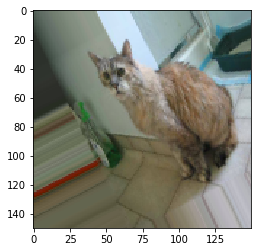

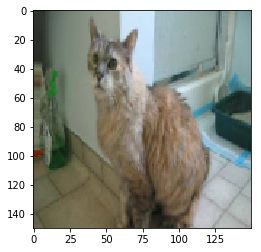

In [18]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [20]:
%%time

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

valid_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=valid_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 23s 228ms/step - loss: 0.6921 - acc: 0.5159 - val_loss: 0.6772 - val_acc: 0.5266
Epoch 2/100
100/100 [==============================] - 23s 232ms/step - loss: 0.6808 - acc: 0.5613 - val_loss: 0.6763 - val_acc: 0.5477
Epoch 3/100
100/100 [==============================] - 23s 234ms/step - loss: 0.6665 - acc: 0.5953 - val_loss: 0.6757 - val_acc: 0.5571
Epoch 4/100
100/100 [==============================] - 26s 259ms/step - loss: 0.6615 - acc: 0.5994 - val_loss: 0.6200 - val_acc: 0.6534
Epoch 5/100
100/100 [==============================] - 22s 218ms/step - loss: 0.6379 - acc: 0.6328 - val_loss: 0.5908 - val_acc: 0.6796
Epoch 6/100
100/100 [==============================] - 23s 233ms/step - loss: 0.6244 - acc: 0.6409 - val_loss: 0.5858 - val_acc: 0.6972
Epoch 7/100
100/100 [==============================] - 25s 246ms/step - loss: 0.6083 - acc: 0.6575 -

In [21]:
model.save('../model/cats_and_dogs_small_2.h5')

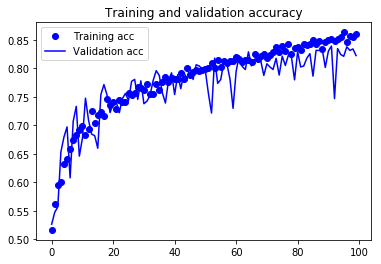

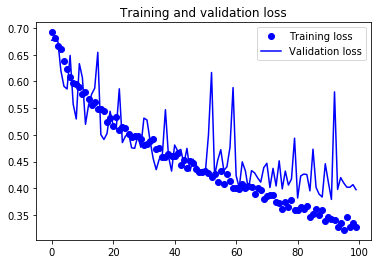

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
import keras.backend as K

del model
K.clear_session()

## 5.3 Using a pretrained convnet

Use MobilNet as a base model.

In [24]:
from keras.applications import MobileNet

conv_base = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

In [25]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (Activation)  (None, 64, 64, 32)        0         
__________

### Train a model whose input is extracted features.

In [26]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '../data/cats_and_dogs_small/'

train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 1024))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(128, 128),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
valid_features, valid_labels = extract_features(valid_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 1024))
valid_features = np.reshape(valid_features, (1000, 4 * 4 * 1024))
test_features = np.reshape(test_features, (1000, 4 * 4 * 1024))

In [28]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 1024))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(valid_features, valid_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 809us/step - loss: 0.3507 - acc: 0.8635 - val_loss: 0.1103 - val_acc: 0.9550
Epoch 2/30
2000/2000 [==============================] - 1s 665us/step - loss: 0.1017 - acc: 0.9610 - val_loss: 0.1041 - val_acc: 0.9590
Epoch 3/30
2000/2000 [==============================] - 1s 660us/step - loss: 0.0512 - acc: 0.9805 - val_loss: 0.0852 - val_acc: 0.9710
Epoch 4/30
2000/2000 [==============================] - 1s 661us/step - loss: 0.0318 - acc: 0.9890 - val_loss: 0.0709 - val_acc: 0.9690
Epoch 5/30
2000/2000 [==============================] - 1s 663us/step - loss: 0.0211 - acc: 0.9910 - val_loss: 0.0711 - val_acc: 0.9730
Epoch 6/30
2000/2000 [==============================] - 1s 663us/step - loss: 0.0109 - acc: 0.9965 - val_loss: 0.0739 - val_acc: 0.9720
Epoch 7/30
2000/2000 [==============================] - 1s 660us/step - loss: 0.0050 - acc: 0.9985 - val_loss: 0.0764 - val_acc: 0.9730


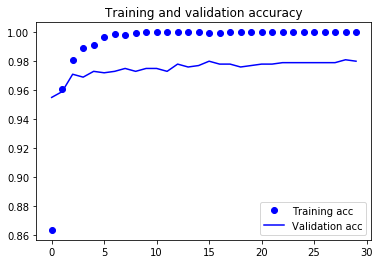

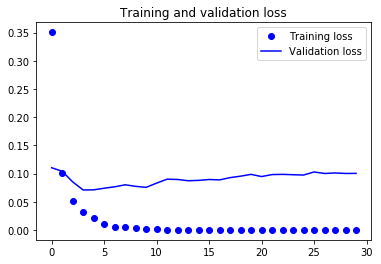

In [29]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [30]:
# import keras.backend as K
# import tensorflow as tf

# del model
# K.clear_session()

### Train a model by adding dense layers to the base model

In [31]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (Activation)  (None, 64, 64, 32)        0         
__________

In [33]:
import tensorflow as tf

with tf.variable_scope(tf.get_variable_scope(), reuse=True):
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Model)   (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               4194560   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 7,423,681
Trainable params: 7,401,793
Non-trainable params: 21,888
_________________________________________________________________


In [35]:
conv_base.trainable = False

In [36]:
model.trainable_weights

[<tf.Variable 'dense_3/kernel:0' shape=(16384, 256) dtype=float32_ref>,
 <tf.Variable 'dense_3/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_4/kernel:0' shape=(256, 1) dtype=float32_ref>,
 <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32_ref>]

In [37]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

valid_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=valid_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
 - 12s - loss: 0.4102 - acc: 0.8165 - val_loss: 0.1043 - val_acc: 0.9530
Epoch 2/30
 - 11s - loss: 0.2681 - acc: 0.8840 - val_loss: 0.0818 - val_acc: 0.9620
Epoch 3/30
 - 11s - loss: 0.2342 - acc: 0.9110 - val_loss: 0.0853 - val_acc: 0.9660
Epoch 4/30
 - 11s - loss: 0.2106 - acc: 0.9190 - val_loss: 0.1255 - val_acc: 0.9520
Epoch 5/30
 - 11s - loss: 0.2003 - acc: 0.9200 - val_loss: 0.0684 - val_acc: 0.9680
Epoch 6/30
 - 11s - loss: 0.1990 - acc: 0.9155 - val_loss: 0.1397 - val_acc: 0.9490
Epoch 7/30
 - 11s - loss: 0.1694 - acc: 0.9325 - val_loss: 0.1455 - val_acc: 0.9460
Epoch 8/30
 - 11s - loss: 0.1946 - acc: 0.9230 - val_loss: 0.1137 - val_acc: 0.9600
Epoch 9/30
 - 11s - loss: 0.1629 - acc: 0.9350 - val_loss: 0.1626 - val_acc: 0.9440
Epoch 10/30
 - 11s - loss: 0.1592 - acc: 0.9350 - val_loss: 0.0773 - val_acc: 0.9660
Epoch 11/30
 - 11s - loss: 0.1515 - acc: 0.9380 - val_loss: 0.1612 - val_ac

In [38]:
model.save('../model/cats_and_dogs_small_3.h5')

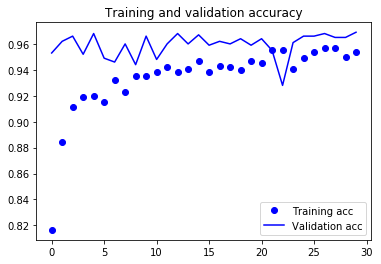

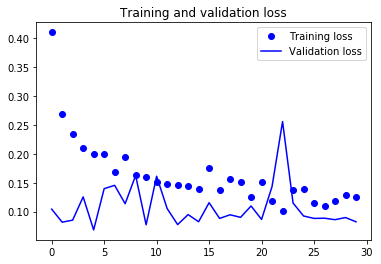

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Train a fine-tuning model

Note that the same model which was trained above will be used.

In [40]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (Activation)  (None, 64, 64, 32)        0         
__________

In [41]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv_pw_13':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [42]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=valid_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 13s 129ms/step - loss: 0.1295 - acc: 0.9525 - val_loss: 0.1038 - val_acc: 0.9640
Epoch 2/100
100/100 [==============================] - 12s 121ms/step - loss: 0.1123 - acc: 0.9525 - val_loss: 0.1197 - val_acc: 0.9600
Epoch 3/100
100/100 [==============================] - 11s 114ms/step - loss: 0.0952 - acc: 0.9580 - val_loss: 0.1029 - val_acc: 0.9650
Epoch 4/100
100/100 [==============================] - 11s 114ms/step - loss: 0.1044 - acc: 0.9580 - val_loss: 0.1016 - val_acc: 0.9650
Epoch 5/100
100/100 [==============================] - 11s 114ms/step - loss: 0.0992 - acc: 0.9620 - val_loss: 0.1027 - val_acc: 0.9650
Epoch 6/100
100/100 [==============================] - 11s 113ms/step - loss: 0.0977 - acc: 0.9595 - val_loss: 0.1045 - val_acc: 0.9650
Epoch 7/100
100/100 [==============================] - 11s 114ms/step - loss: 0.1016 - acc: 0.9600 - val_loss: 0.1103 - val_acc: 0.9650
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 12s 124ms/step - loss: 0.0597 - acc: 0.9785 - val_loss: 0.1259 - val_acc: 0.9640
Epoch 62/100
100/100 [==============================] - 13s 130ms/step - loss: 0.0562 - acc: 0.9775 - val_loss: 0.1214 - val_acc: 0.9650
Epoch 63/100
100/100 [==============================] - 14s 141ms/step - loss: 0.0581 - acc: 0.9770 - val_loss: 0.1219 - val_acc: 0.9640
Epoch 64/100
100/100 [==============================] - 14s 141ms/step - loss: 0.0507 - acc: 0.9785 - val_loss: 0.1292 - val_acc: 0.9580
Epoch 65/100
100/100 [==============================] - 13s 131ms/step - loss: 0.0457 - acc: 0.9830 - val_loss: 0.1256 - val_acc: 0.9650
Epoch 66/100
100/100 [==============================] - 13s 126ms/step - loss: 0.0551 - acc: 0.9820 - val_loss: 0.1314 - val_acc: 0.9550
Epoch 67/100
100/100 [==============================] - 14s 136ms/step - loss: 0.0610 - acc: 0.9750 - val_loss: 0.1267 - val_acc: 0.9620
Epoch 68/100
100/100 [===================

In [43]:
model.save('../model/cats_and_dogs_small_4.h5')

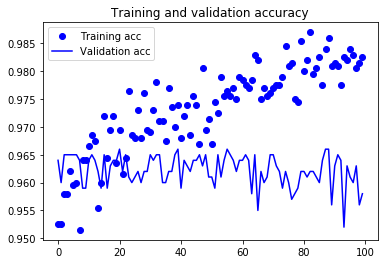

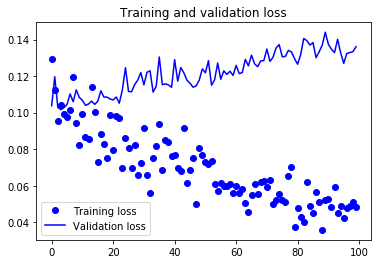

In [44]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

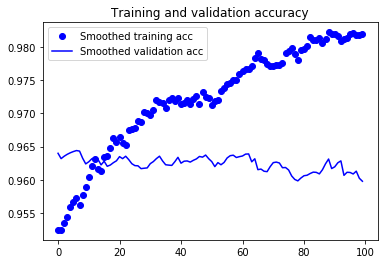

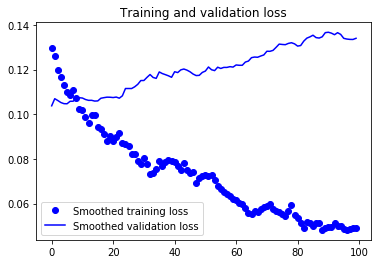

In [45]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [46]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9549999916553498


In [47]:
import keras.backend as K

del model
K.clear_session()

## 5.4 Visualizing what convets learn

In [48]:
from keras.models import load_model

model = load_model('../model/cats_and_dogs_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [49]:
img_path = '../data/cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


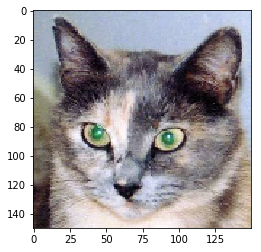

In [50]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [51]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [52]:
activations = activation_model.predict(img_tensor)

In [53]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


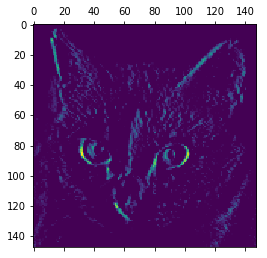

In [54]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

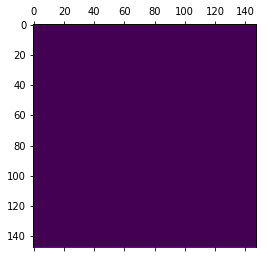

In [55]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


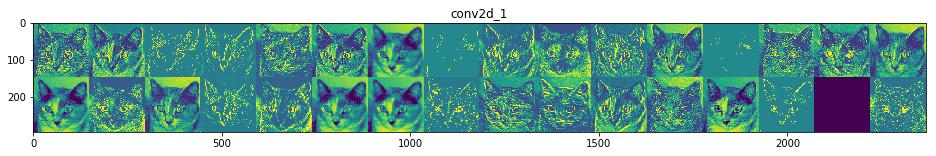

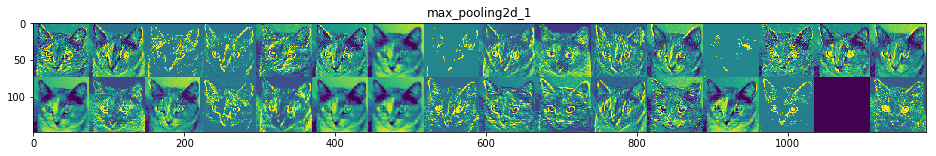

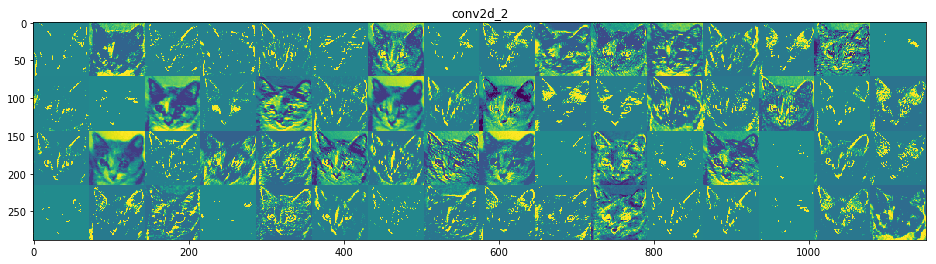

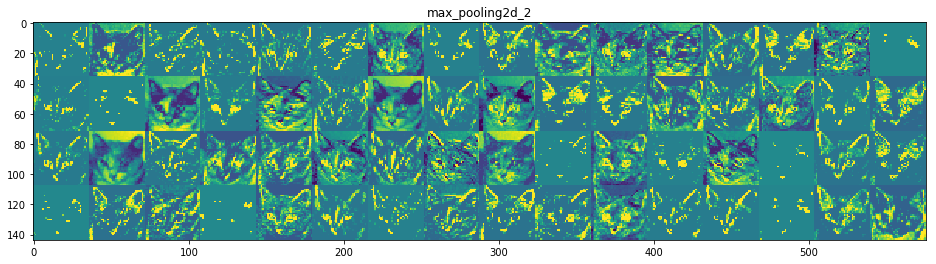

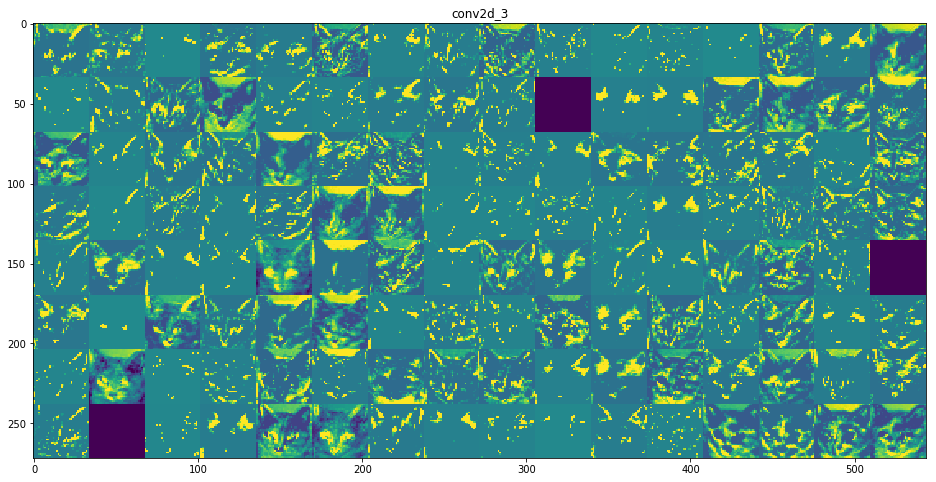

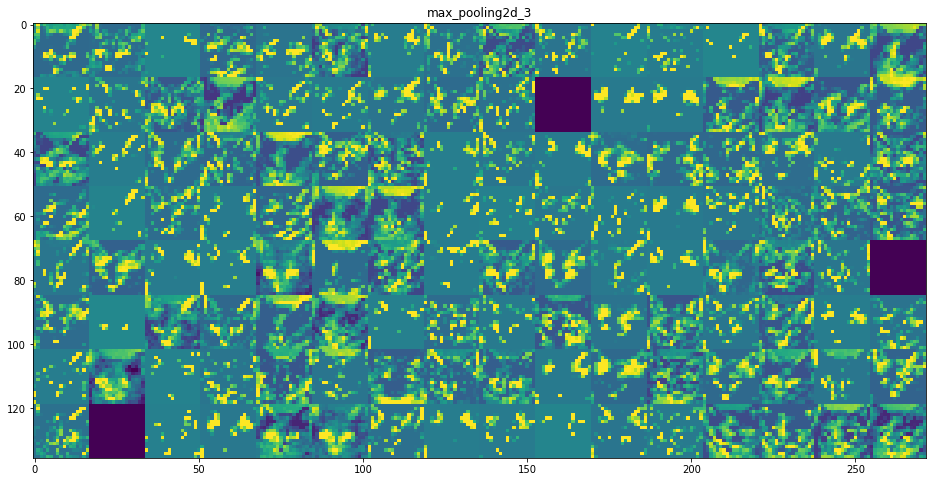

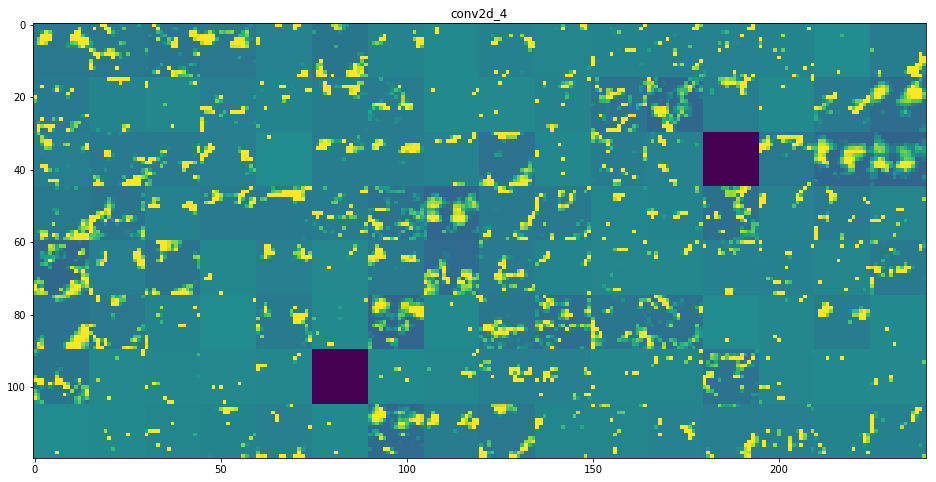

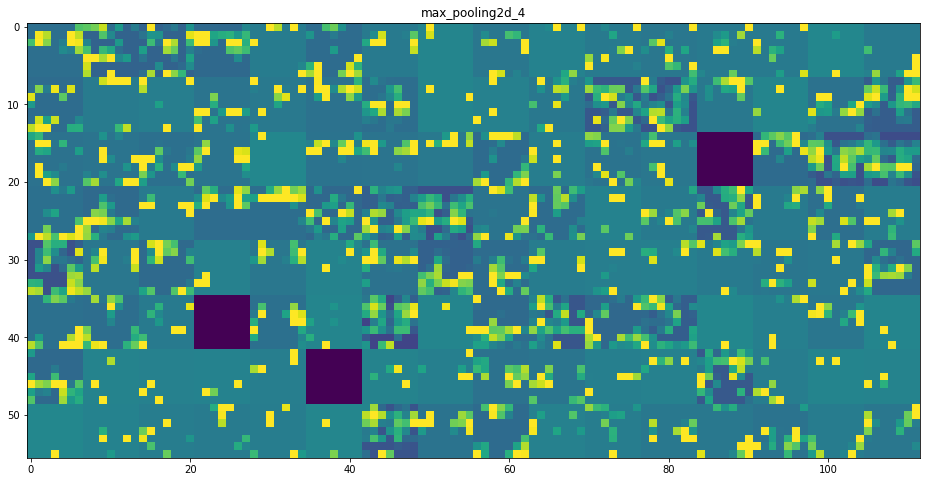

In [56]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

### Visualizing convnet filters

In [13]:
# from keras.applications import MobileNet
# from keras import backend as K

# model = MobileNet(weights='imagenet', include_top=False, input_shape=(128,128,3))

# layer_name = 'conv_pw_4'
# filter_index = 0

# layer_output = model.get_layer(layer_name).output
# loss = K.mean(layer_output[:, :, :, filter_index])

In [1]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet', include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# The call to `gradients` returns a list of tensors (of size 1 in this case)
# hence we only keep the first element -- which is a tensor.
grads = K.gradients(loss, model.input)[0]

In [3]:
# We add 1e-5 before dividing so as to avoid accidentally dividing by 0.
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [4]:
iterate = K.function([model.input], [loss, grads])

# Let's test it:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 128, 128, 3))])

In [5]:
# We start from a gray image with some noise
input_img_data = np.random.random((1, 128, 128, 3)) * 20 + 128.

# Run gradient ascent for 40 steps
step = 1.  # this is the magnitude of each gradient update
for i in range(40):
    # Compute the loss value and gradient value
    loss_value, grads_value = iterate([input_img_data])
    # Here we adjust the input image in the direction that maximizes the loss
    input_img_data += grads_value * step

In [6]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

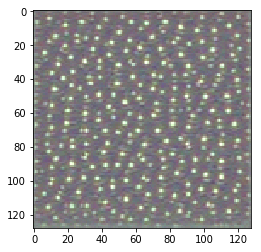

In [8]:
plt.imshow(deprocess_image(input_img_data[0]))
plt.show()

In [9]:
def generate_pattern(layer_name, filter_index, size=128):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # Compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]

    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # This function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # Run gradient ascent for 40 steps
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

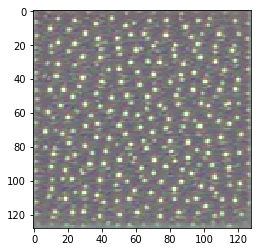

In [11]:
plt.imshow(generate_pattern('block3_conv1', 0))
plt.show()

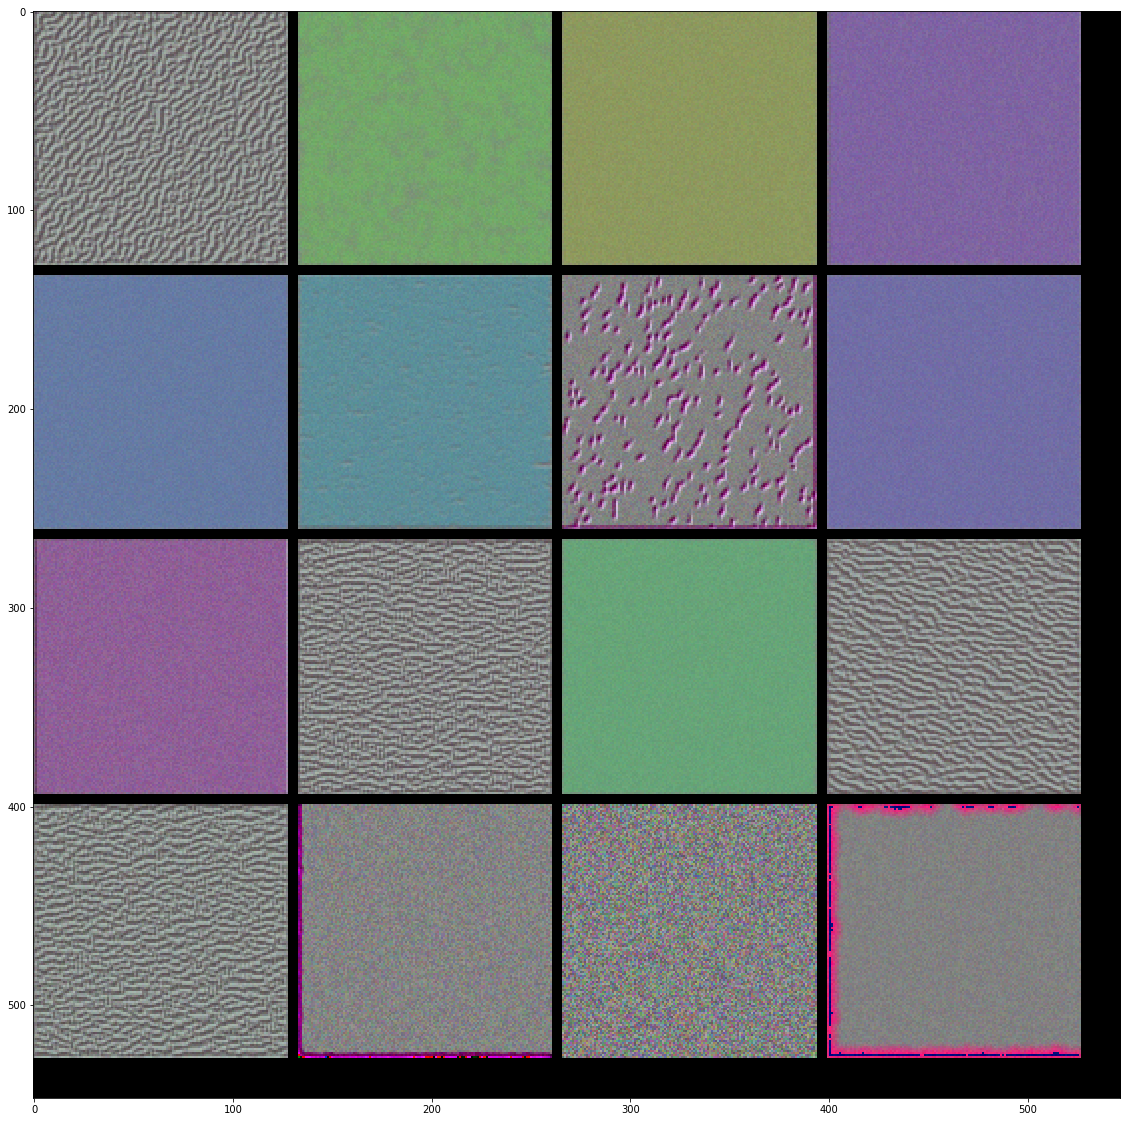

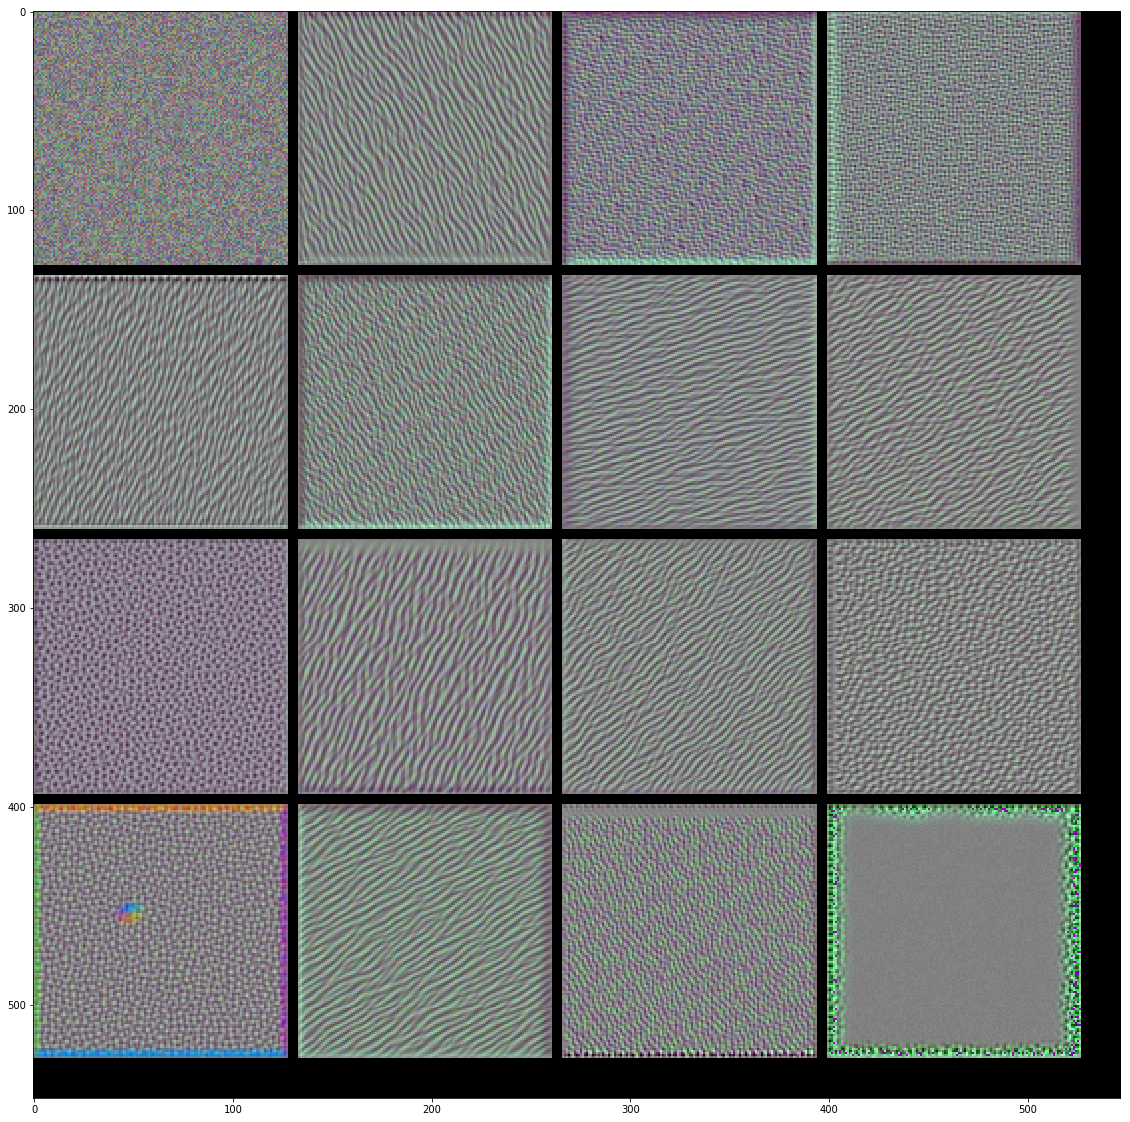

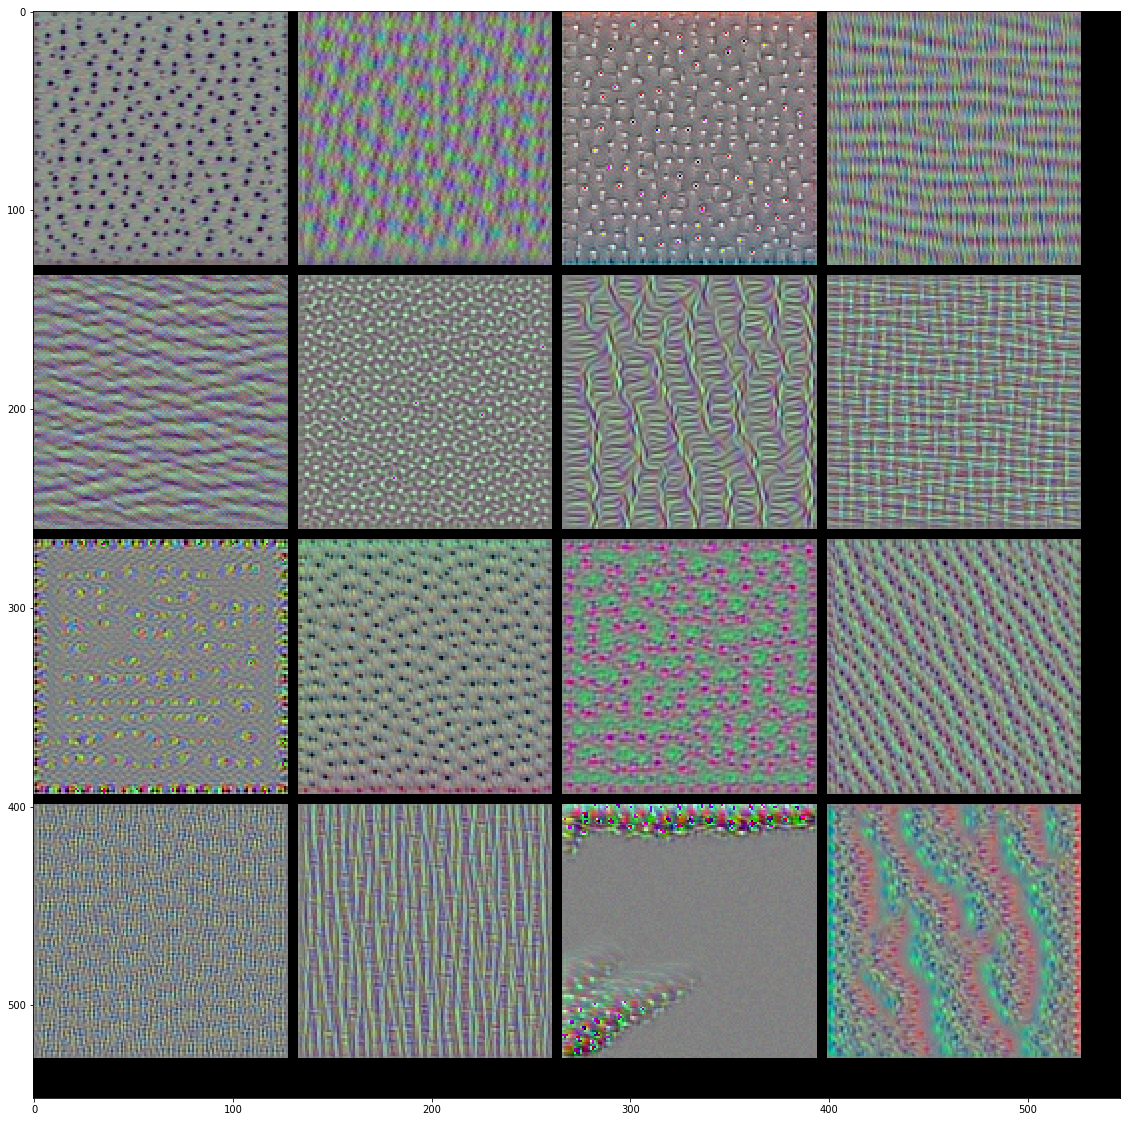

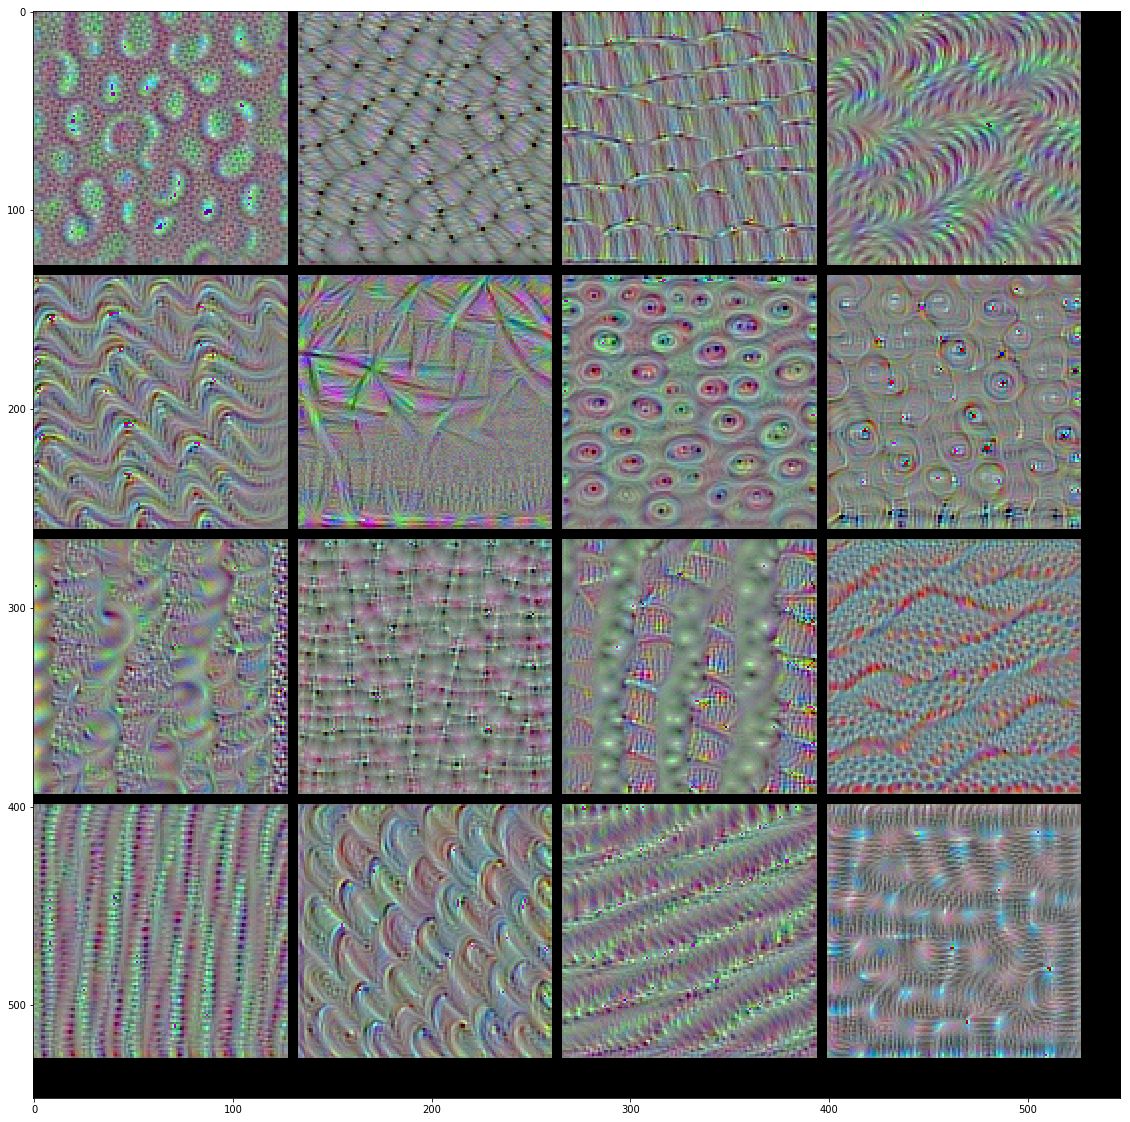

In [12]:
# for layer_name in ['conv_pw_1', 'conv_pw_5', 'conv_pw_9', 'conv_pw_13']:
for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size = 128
    margin = 5

    # This a empty (black) image where we will store our results.
    results = np.zeros((4 * size + 7 * margin, 4 * size + 7 * margin, 3))

    for i in range(4):  # iterate over the rows of our results grid
        for j in range(4):  # iterate over the columns of our results grid
            # Generate the pattern for filter `i + (j * 8)` in `layer_name`
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

            # Put the result in the square `(i, j)` of the results grid
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # Display the results grid
    plt.figure(figsize=(20, 20))
    plt.imshow(results)
    plt.show()